Input x = 0.200000, Gewünschter Output y = 0.20
Iter	x	w	net i	a	y_hat	y	E	E'	w delta
0	0.2	-10.00	-2.00	0.12	0.12	0.20	0.00	-0.01	0.00	
10	0.2	-9.96	-1.99	0.12	0.12	0.20	0.00	-0.01	0.00	
20	0.2	-9.92	-1.98	0.12	0.12	0.20	0.00	-0.01	0.00	
30	0.2	-9.87	-1.97	0.12	0.12	0.20	0.00	-0.01	0.00	
40	0.2	-9.83	-1.97	0.12	0.12	0.20	0.00	-0.01	0.00	
50	0.2	-9.79	-1.96	0.12	0.12	0.20	0.00	-0.01	0.00	
60	0.2	-9.75	-1.95	0.12	0.12	0.20	0.00	-0.01	0.00	
70	0.2	-9.71	-1.94	0.13	0.13	0.20	0.00	-0.01	0.00	
80	0.2	-9.67	-1.93	0.13	0.13	0.20	0.00	-0.01	0.00	
90	0.2	-9.63	-1.93	0.13	0.13	0.20	0.00	-0.01	0.00	
100	0.2	-9.59	-1.92	0.13	0.13	0.20	0.00	-0.01	0.00	
110	0.2	-9.55	-1.91	0.13	0.13	0.20	0.00	-0.01	0.00	
120	0.2	-9.51	-1.90	0.13	0.13	0.20	0.00	-0.01	0.00	
130	0.2	-9.47	-1.89	0.13	0.13	0.20	0.00	-0.01	0.00	
140	0.2	-9.43	-1.89	0.13	0.13	0.20	0.00	-0.01	0.00	
150	0.2	-9.39	-1.88	0.13	0.13	0.20	0.00	-0.01	0.00	
160	0.2	-9.35	-1.87	0.13	0.13	0.20	0.00	-0.01	0.00	
170	0.2	-9.31	-1.86	0.13	0.13	0.20	0.00	

Text(0.5, 0, 'Gewicht')

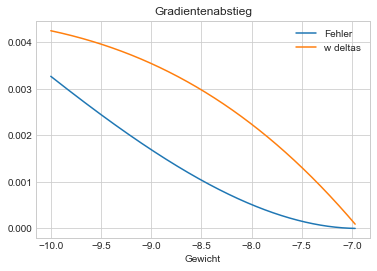

In [59]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

def func_id(x):
    return 1.0 / (1.0 + np.exp(-x))

# Initialisierungen
x = 0.2
y = x

# Startgewicht
weight = -10.0

# Für den Plot
weights = []
errors = []
w_deltas = []

# Print Überschrift
print("Input x = {:.6f}, Gewünschter Output y = {:.2f}".format(x,y))

print("{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}\t{}".format('Iter', 'x', 'w', 'net i', 'a', 'y_hat', 'y', 'E', "E'", 'w delta'))

# Fixe 120 Schritte
for step in range(2000):
    # Net Input berechnen
    net_i = weight * x

    # Aktivierung (identische Funktion)
    activation = func_id(net_i)

    # Errechneter Output
    y_hat = activation

    # Quadratischer Fehler: gewünschter - errechneter Output
    error = 0.5 * (y - y_hat) ** 2

    # Gradient
    derivative = (-1.0) * activation * (1.0 - activation) * (y - y_hat) 

    # Delta für Gewichtsanpassung
    w_delta = (-1) * derivative * 0.5

    # Daten für den Plot (weight, error)
    weights.append(weight)
    errors.append(error)

    w_deltas.append(w_delta)

    # Ausgabe der Änderungen alle 10 Schritte
    if step % 10 == 0:
        print("{}\t{}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t{:.2f}\t".format(step, x, weight, net_i, activation, y_hat, y, error, derivative, w_delta))
    # Dafür machen wir das alles: Gewichtsanpassung == Lernen
    weight += w_delta

# Plot erzeugen
# Figure und Subplot
fig, ax1 = plt.subplots()
ax1.plot(weights, errors, label="Fehler")
ax1.plot(weights, w_deltas, label="w deltas")

# Titel
ax1.set_title('Gradientenabstieg')

# Legende
legend = ax1.legend(loc='best', fancybox=True, framealpha=0.5)

# Label
plt.xlabel('Gewicht')


[[-0.251 0.901 0.464]
 [0.197 -0.688 -0.688]
 [-0.884 0.732 0.202]]
[[-0.278 0.874 0.437]
 [0.202 -0.684 -0.684]
 [-0.877 0.739 0.209]]
Mulit-Layer-Perceptron - Netzwerkarchitektur
[[1.000 1.000 1.000 1.000 1.000]
 [0.000 0.000 0.000 0.000 0.000]
 [0.000 0.000 0.000 0.000 0.000]]
----------v----------
[[8.169 -5.250 -6.959]
 [2.343 -6.046 -6.045]
 [-7.246 4.659 4.658]]
----------v----------
[[1.000 1.000 1.000 1.000 -0.002]
 [2.343 0.912 0.912 0.080 0.000]
 [-7.246 0.001 0.001 0.001 0.000]]
----------v----------
[[0.416 -0.959 0.940]
 [4.586 -9.236 -9.390]]
----------v----------
[[0.000 0.000 0.000 0.000 0.000]
 [-3.848 0.021 0.021 0.020 -0.000]]
----------v----------
Predict:
[1.000 1.000 1.000] 0.0 -> [0.023]
[1.000 0.000 1.000] 1.0 -> [0.976]
[1.000 1.000 0.000] 1.0 -> [0.976]
[1.000 0.000 0.000] 0.0 -> [0.021]


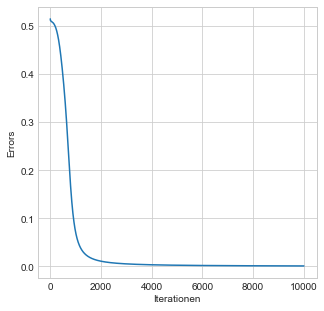

In [60]:
# Kopie aus Kapitel 5 mit kleinen Ergänzungen. Diese sind mit "# NEW" gekennzeichnet 
import matplotlib.pyplot as plt
import numpy as np
from sklearn.utils.validation import check_random_state

%matplotlib inline

class MLP(object):
    # Die identische Funktion
    def func_id(self, x):
        return x
    
    # Aktivierungsfunktion (Sigmoidefunktion)
    def func_sigmoid(self, x):
        return 1.0 / (1.0 + np.exp(-x))

    def __init__(self, n_input_neurons = 2, n_hidden_neurons = 2, n_output_neurons = 1, weights = None,
                 # NEW
                 eta = 0.01, n_iterations=1000, random_state=41,
                 *args, **kwargs):
        """
        Initialisierung des Netzwerkes

        Wir verwenden eine fixe I-H-O Struktur für den Anfang (Input-Hidden-Output)

        Die Anzahl der Neuronen ist flexibel
        Weiter ist es möglich, das Netzwerk mit Gewichten zu intitialiseren [W_IH, W_HO]
        """

        # Die Anzahl der Neuronen pro Layer
        self.n_input_neurons = n_input_neurons
        self.n_hidden_neurons = n_hidden_neurons
        self.n_output_neurons = n_output_neurons

        # Gewichtsinitialisierung
        self.weights = weights

        W_IH = []
        W_HO = []

        # NEW Lernrate
        self.eta = eta

        # NEW Iterations
        self.n_iterations = n_iterations

        # NEW Zufallsgenerator
        self.random_state = random_state

        # NEW Erzeugung des Zufallsgenerators (RNG)
        self.random_state_ = check_random_state(self.random_state)

        # NEW Fehler beim fit
        self.errors = []

        # Hier werden alle Daten zur Netzberechnung abgelegt
        self.network = []

        # Input-Layer + Bias-Neuron: Spalten = o_i
        self.inputLayer = np.zeros((self.n_input_neurons+1,5))
        # Bias-Neuron-Output ist immer +1
        self.inputLayer[0] = 1.0

        # Den Input-Layer zum Netzwerk hinzufügen
        self.network.append(self.inputLayer)

        # Weights vom Input-Layer zum Hidden Layer W_IH
        # Neuron: Zeile x Spalten: Zeilen = # Hidden, Spalten = # Input
        # Nur initialisieren, falls tatsächlich Gewichte vorhanden
        # Einfache Existensprüfung
        if weights:
            W_IH = self.weights[0]
        else:
            # NEW
            W_IH = 2 * self.random_state_.random_sample((self.n_hidden_neurons + 1, self.n_input_neurons + 1)) - 1

        self.network.append(W_IH)

        # NEW HIdden Layer + Bias-Neuron:
        # Spalten = net_i, a_i, o_i, d_i, delta_i
        self.hiddenLayer = np.zeros((self.n_hidden_neurons + 1, 5))

        # Bias-Neuron-Output ist immer +1
        self.hiddenLayer[0] = 1.0

        # Den Hidden Layer zum Netwerk hinzufügen
        self.network.append(self.hiddenLayer)

        # Weights vom Hidden Layer zum Output-Layer W_HO
        # Neuron: Zeile x Spalten: Zeilen = # Output, Spalten = # Hidden
        if weights:
            W_HO = self.weights[1]
        else:
            # NEW
            W_HO = 2 * self.random_state_.random_sample((self.n_output_neurons + 1, self.n_hidden_neurons + 1)) - 1

        self.network.append(W_HO)

        # NEW Output-Layer + Bias-Neuron:
        # Spalten = net_i, a_i, o_i, d_i, delta_i
        self.outputLayer = np.zeros((self.n_output_neurons + 1,5))

        # Bias-Neuron-Output = 0, da nicht relevant
        # Nur wegen einheitlicher Indizierung vorhanden
        self.outputLayer[0] = 0.0

        # Den Output-Layer zum Netzwerk hinzufügen
        self.network.append(self.outputLayer)

    def print(self):
        print('Mulit-Layer-Perceptron - Netzwerkarchitektur')
        # Nur drei Nachkommastellen ausgeben
        np.set_printoptions(formatter={'float': lambda x: "{0:0.3f}".format(x)})
        for idx,nn_part in enumerate(self.network):
            print(nn_part)
            print('----------v----------')

    def predict(self, x):
        """
        Für Eingaben x wird Ausgabe y_hat berechnet.

        Für den Vektor x wird eine Vorhersage berechnet, und die Matrizenwerte der Layer (nicht Gewichte werden angepasst)
        """

        ###############
        # Input Layer
        # Die inputs setzen: Alle Zeilen, Spalte 2
        self.network[0][:,2] = x

        ###############
        # Hidden Layer
        # Start von Zeile 1 wegen Bias Neuron auf Index Position 0
        # net_j = W_ij . x
        self.network[2][1:,0] = np.dot(self.network[1][1:,:],self.network[0][:,2])

        # a_j
        self.network[2][1:,1] = self.func_sigmoid(self.network[2][1:,0]) 

        # o_j
        self.network[2][1:,2] = self.func_id(self.network[2][1:,1]) 

        # NEW der_j = a_j*(1-a_j) Ableitung für sigmoide
        self.network[2][1:,3] = self.network[2][1:,2] * ( 1.0 - self.network[2][1:,2])

        ###############
        # Output Layer
        # Start von Zeile 1 wegen Bias Neuron auf 0
        # net_k = = W_jk . h
        self.network[4][1:,0] = np.dot(self.network[3][1:,:],self.network[2][:,2])

        # a_k
        self.network[4][1:,1] = self.func_sigmoid(self.network[4][1:,0]) 

        # o_k
        self.network[4][1:,2] = self.func_id(self.network[4][1:,1])

        # NEW der_k = a_k*(1-a_k) Ableitung für sigmoide
        self.network[4][1:,3] = self.network[4][1:,2] * ( 1.0 - self.network[4][1:,2])

        # Rückgabe Output Vektor
        return self.network[4][:,2]

    def fit(self, X, Y):
        """
        Lernen
        """

        # Gewichtsänderung
        delta_w_jk = []
        delta_w_ij = []

        # Fehler
        self.errors = []

        testZwei = 0
        # Alle Iterationen
        for iteration in range(self.n_iterations):
            # Für alle Trainingsbeispiele
            error = 0.0

            for x,y in zip(X,Y):
                # Vorwärtspfad
                y_hat = self.predict(x)
                # Differenz
                diff = y - y_hat
                # Quadratischer Fehler
                error += 0.5 * np.sum(diff * diff)

                # Output Layer
                # delta_k in der Output-Schicht = der_k * e_k
                self.network[4][:,4] = self.network[4][:, 3] * diff

                # Hidden Layer
                # delta_j in der Hidden Schicht = der_j * dot(W_kj^T, delta_k)
                self.network[2][:,4] = self.network[2][:,3] * np.dot(self.network[3][:].T, self.network[4][:,4])

                # Gewichtsdeltas von W_kj
                # delta_w = eta * delta_k . o_j ^ T
                delta_w_jk = self.eta * np.outer(self.network[4][:,4], self.network[2][:,2].T)

                # Gewichtsdeltas von W_ji
                # delta_w = eta * delta_j . o_i ^ T
                delta_w_ij = self.eta * np.outer(self.network[2][:,4], self.network[0][:,2].T)

                # Gewichte anpassen
                self.network[1][:,:] += delta_w_ij
                self.network[3][:,:] += delta_w_jk

            # Sammeln des Fehlers für alle Beispiele
            self.errors.append(error)

    def plot(self):
        """
        Ausgabe des Fehlers
        Die im Fehlerarray gespeicherten Fehler als Grafik ausgeben
        """

        # Figure-Nummern Start
        fignr = 1

        # Druckgröße in inch
        plt.figure(fignr, figsize=(5,5))

        # Ausgabe Fehler als Plot
        plt.plot(self.errors)

        # Raster
        plt.style.use('seaborn-whitegrid')

        # Labels
        plt.xlabel('Iterationen')
        plt.ylabel('Errors')
    
#################################################
# Initialisierung der Gewichte
X=np.array([[1.0,1.0,1.0],[1.0,0,1.0],[1.0,1.0,0],[1.0,0,0]])
Y=np.array([[0.0,0.0],[0.0,1.0],[0.0,1.0],[0.0,0.0]])

# Netzwerk initialisieren
nn = MLP(eta = 0.3, n_iterations = 10000, random_state = 42)

# Trainieren des Netzes mit der fit-Methode und Ausgabe nach dem Trainieren
nn.fit(X,Y)
nn.print()

# Error-Ausgabe als Graph
nn.plot()

print('Predict:')
for x,y in zip(X,Y):
    print('{} {} -> {}'.format(x,y[1], nn.predict(x)[1:2]))









# Leerzeichen